# Read Audio File

/var/folders/rj/9n9dpytj2n74_jwlj_p0xk9m0000gn/T/ipykernel_38732/3190595743.py:6: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, data = wavfile.read('bumblebee_small.wav')


Text(0.5, 1.0, 'Song fft')

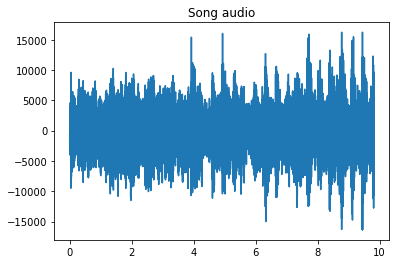

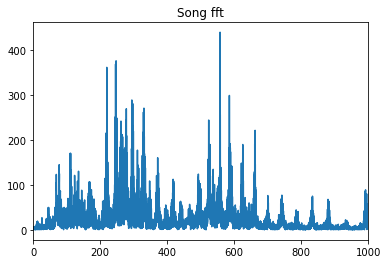

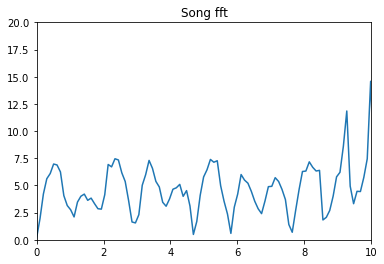

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack
from scipy.io import wavfile

fs, data = wavfile.read('bumblebee_small.wav')
audio = (data[:,0] + data[:,1]) / 2
data[:,0] = audio
data[:,1] = audio
wavfile.write("bumblebee_small_av.wav", fs, data)


np.savetxt("c0.txt", data[:,0], delimiter="|")
np.savetxt("c1.txt", data[:,1], delimiter="|")

N = len(audio)
T = 1/fs
t = np.linspace(0.0, N*T, N)

plt.figure()
plt.plot(t, audio)
plt.title('Song audio')

audiof = scipy.fftpack.fft(audio)
f = np.linspace(0.0, 1.0/(2.0*T), N//2)

plt.figure()
plt.plot(f, 2.0/N * np.abs(audiof[:N//2]))
plt.xlim([0,1000])
plt.title('Song fft')

plt.figure()
plt.plot(f, 2.0/N * np.abs(audiof[:N//2]))
plt.xlim([0,10])
plt.ylim([0,20])
plt.title('Song fft')

# Create data waves

Text(0.5, 1.0, 'Image fft')

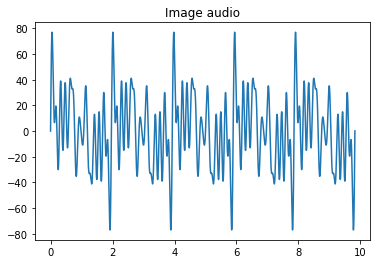

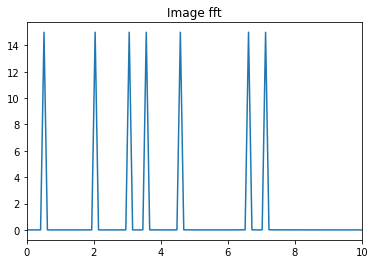

In [42]:
img_data = [0,1,0,0,1,0,1,1,0,1,0,0,0,1,1]
# img_data = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
ampl = 15
img = 0 * t;
neg_audio = 0 * t
for i in range(len(img_data)):
    img += img_data[i] * ampl * np.sin(f[5*i] * 2.0*np.pi*t)

plt.figure()
plt.plot(t, img)
plt.title('Image audio')

imgf = scipy.fftpack.fft(img)

plt.figure()
plt.plot(f, 2.0/N * np.abs(imgf[:N//2]))
plt.xlim([0, 10])
plt.title('Image fft')

# Add data to audio

Text(0.5, 1.0, 'Song fft')

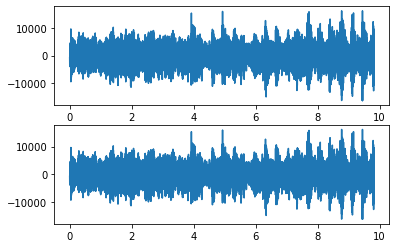

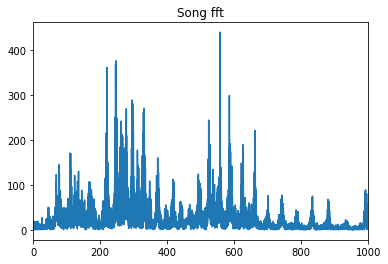

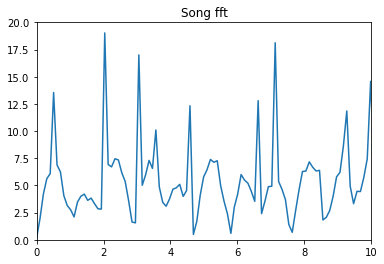

In [43]:
img_audio = audio + img
data[:,0] = img_audio
data[:,1] = img_audio
wavfile.write("bumblebee_small_aug.wav", fs, data)
plt.subplot(2, 1, 1)
plt.plot(t, audio)
plt.subplot(2, 1, 2)
plt.plot(t, img_audio)

img_audiof = scipy.fftpack.fft(img_audio)

plt.figure()
plt.plot(f, 2.0/N * np.abs(img_audiof[:N//2]))
plt.xlim([0,1000])
plt.title('Song fft')

plt.figure()
plt.plot(f, 2.0/N * np.abs(img_audiof[:N//2]))
plt.xlim([0,10])
plt.ylim([0,20])
plt.title('Song fft')

# Re-read audio and retrieve data

Text(0.5, 1.0, 'Song fft')

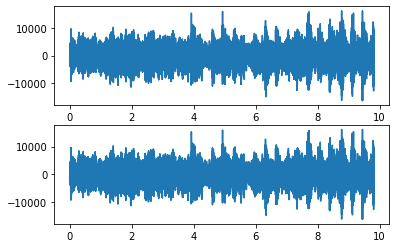

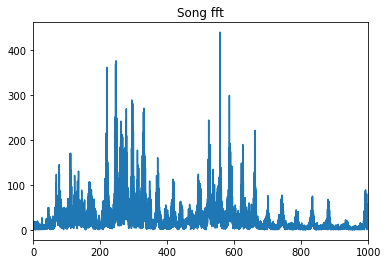

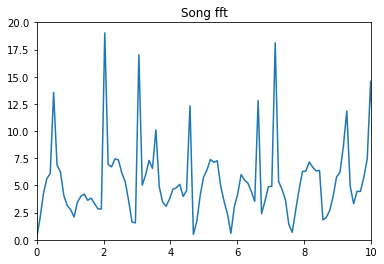

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack
from scipy.io import wavfile

fs, data = wavfile.read('bumblebee_small_aug.wav')
audio_aug = data[:,1]

N = len(audio_aug)
T = 1/fs
t = np.linspace(0.0, N*T, N)

plt.subplot(2, 1, 1)
plt.plot(t, audio_aug)
plt.subplot(2, 1, 2)
plt.plot(t, img_audio)

audio_augf = scipy.fftpack.fft(audio_aug)
f = np.linspace(0.0, 1.0/(2.0*T), N//2)

plt.figure()
plt.plot(f, 2.0/N * np.abs(audio_augf[:N//2]))
plt.xlim([0,1000])
plt.title('Song fft')

plt.figure()
plt.plot(f, 2.0/N * np.abs(audio_augf[:N//2]))
plt.xlim([0,10])
plt.ylim([0,20])
plt.title('Song fft')